# AMATH 522: HW6
## Minho Choi
### Problem 1

Here we import all the packages we needed:

In [184]:
import matplotlib.pylab as plt   
%matplotlib inline  
import numpy as np 
import scipy.integrate as scint

First, we define a function that calculates the ODE for two repressilators:

In [185]:
def repressilator_odefun(t, x, alpha, alpha0, beta, n, gamma):
    '''
    Flow (dx/dt) of the repressilator system to pass into the numerical solver.
    
    Takes as input: 
        - current time point t (no explicit time dependence in code, but necessary for scipy solver),
        - current state vector x (12-vector: first three entries are m_i, second three are p_i, third three are n_i, last three are q_i)
        - parameters alpha, alpha0, beta, n, gamma (to be passed into solver as 'args')
    
    Returns: vector of derivatives as given by the repressilator ODEs
    '''
    
    # input vector x contains all state variables, extract accordingly
    m1=x[0]; m2=x[1]; m3=x[2] 
    p1=x[3]; p2=x[4]; p3=x[5]
    n1=x[6]; n2=x[7]; n3=x[8] 
    q1=x[9]; q2=x[10]; q3=x[11]
    
    # derivative of each variable
    dm1dt = -m1 + alpha/(1.+p3**n) + alpha0
    dm2dt = -m2 + alpha/(1.+p1**n) + alpha0
    dm3dt = -m3 + alpha/(1.+p2**n) + alpha0

    dp1dt = -beta*(p1-m1) + gamma*(q1 - p1)
    dp2dt = -beta*(p2-m2) + gamma*(q2 - p2)
    dp3dt = -beta*(p3-m3) + gamma*(q3 - p3)

    dn1dt = -n1 + alpha/(1.+q3**n) + alpha0
    dn2dt = -n2 + alpha/(1.+q1**n) + alpha0
    dn3dt = -n3 + alpha/(1.+q2**n) + alpha0

    dq1dt = -beta*(q1-n1) + gamma*(p1 - q1)
    dq2dt = -beta*(q2-n2) + gamma*(p2 - q2)
    dq3dt = -beta*(q3-n3) + gamma*(p3 - q3)

    return np.array([dm1dt, dm2dt, dm3dt, dp1dt, dp2dt, dp3dt, dn1dt, dn2dt, dn3dt, dq1dt, dq2dt, dq3dt])

Next, we initialize the range of time (choosed large enough range to see when oscillation happens):

In [186]:
# specify trange, a time range for simulation: two element array
tstart=0
tend=300
trange=np.array([tstart,tend])

# specify tlist,  a list of time points at which want to return the solution
numt=1000
tlist=np.linspace(tstart,tend,numt)

To run the simulation using different parameter values and see the changes, we define a function that runs the simulation and plot the changes in concentrations:

In [187]:
def run_simulation(alpha, alpha0, beta, n, gamma):
    #Define initial condition, at random 
    rng = np.random.default_rng(123) # set seed, so we get same ICs each time
    x0=rng.uniform(0,4,12) # 12 random numbers between 0 and 4 

    # Solve!
    sol=scint.solve_ivp(repressilator_odefun, trange, x0, t_eval=tlist, args=(alpha,alpha0,beta,n,gamma))
    
    return sol

def plot_solution(ax, sol):
    # Plot!
    # sol object has "attributes" t (time points) and y (actual solution: state variables)
    ax.plot(sol.t,sol.y[0,:],label='m1')
    ax.plot(sol.t,sol.y[1,:],label='m2')
    ax.plot(sol.t,sol.y[2,:],label='m3')
    ax.plot(sol.t,sol.y[3,:],label='p1')
    ax.plot(sol.t,sol.y[4,:],label='p2')
    ax.plot(sol.t,sol.y[5,:],label='p3')
    ax.plot(sol.t,sol.y[6,:],label='n1')
    ax.plot(sol.t,sol.y[7,:],label='n2')
    ax.plot(sol.t,sol.y[8,:],label='n3')
    ax.plot(sol.t,sol.y[9,:],label='q1')
    ax.plot(sol.t,sol.y[10,:],label='q2')
    ax.plot(sol.t,sol.y[11,:],label='q3')


We start with producing a clear oscillations for the uncoupled system ($\gamma$ = 0):

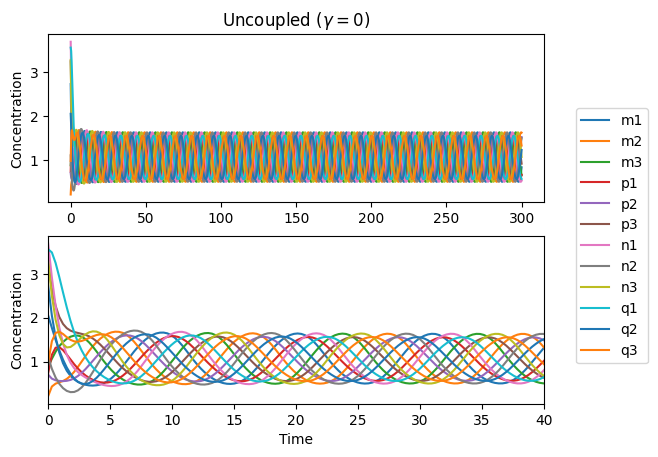

In [188]:
# Define paramaters
alpha=2 # max repression rate of each gene by corresponding repressor
alpha0=0.02 # base transcription rate of each gene
beta=1 # protein degradation rate
n=3 # Hill coefficient
gamma=0 # Coupling strength

sol = run_simulation(alpha, alpha0, beta, n, gamma)
fig, axs = plt.subplots(2)

plot_solution(axs[0], sol)
axs[0].set_title('Uncoupled ($\gamma = 0$)')
axs[0].set_ylabel('Concentration')

plot_solution(axs[1], sol)
axs[1].set_xlim(0, 40)
axs[1].set_ylabel('Concentration')
axs[1].set_xlabel('Time')
axs[1].legend(loc='center left', bbox_to_anchor=(1.05, 1))

The top plot shows the concentration values oscillating for entire 300 time units, where the bottom plot zooms into time range 0 to 40 of the top plot. Here, we can see that there is a clear oscillations starting from approximately 10 time units after the transient period. Next, we look at what happens when we increase $\gamma$ value in positive side:

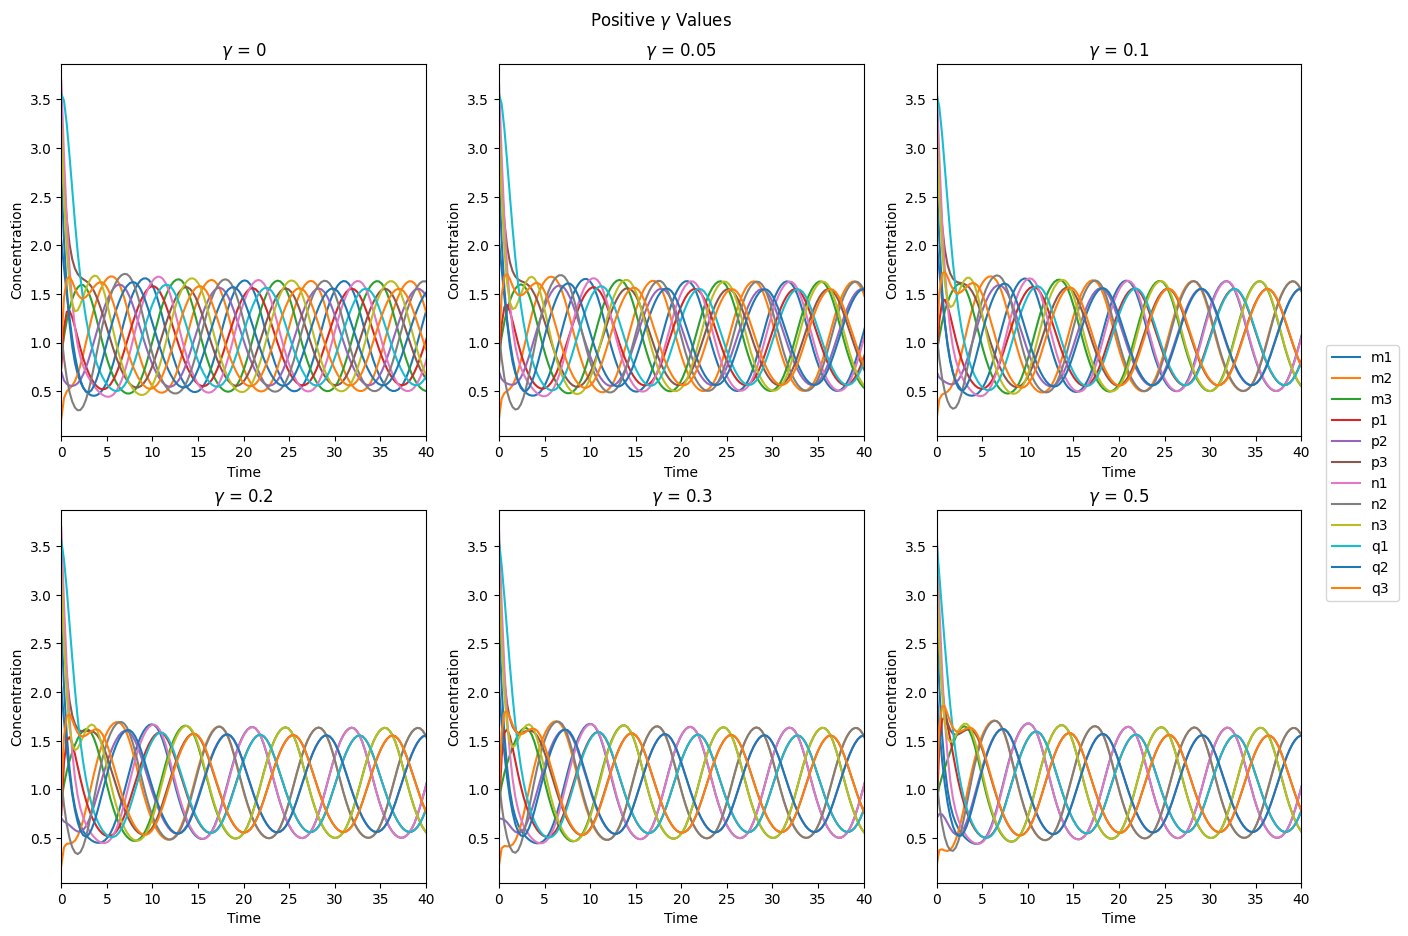

In [189]:
gamma=0 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Positive $\gamma$ Values')

plot_solution(axs[0, 0], sol)
axs[0, 0].set_xlim(0, 40)
axs[0, 0].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Concentration')

gamma=0.05 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[0, 1], sol)
axs[0, 1].set_xlim(0, 40)
axs[0, 1].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Concentration')

gamma=0.1 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[0, 2], sol)
axs[0, 2].set_xlim(0, 40)
axs[0, 2].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Concentration')

gamma=0.2 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 0], sol)
axs[1, 0].set_xlim(0, 40)
axs[1, 0].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Concentration')

gamma=0.3 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 1], sol)
axs[1, 1].set_xlim(0, 40)
axs[1, 1].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Concentration')

gamma=0.5 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 2], sol)
axs[1, 2].set_xlim(0, 40)
axs[1, 2].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Concentration')
axs[1, 2].legend(loc='center left', bbox_to_anchor=(1.05, 1.1))

fig.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.2, wspace=0.2)

From the above plots, we see that the trajectories of two oscillations converge faster as we increase the value of $\gamma$. When $\gamma = 0.05$, two oscillations synchronize after 40 time steps, while when $\gamma = 0.5$, two oscillations synchronize within 10 time steps. We can see clear picture of synchronization by further looking at the parametric curve $(m_1(t), n_1(t))$ (Or any pair of concentration with one from first repressilator and another from second repressilator):

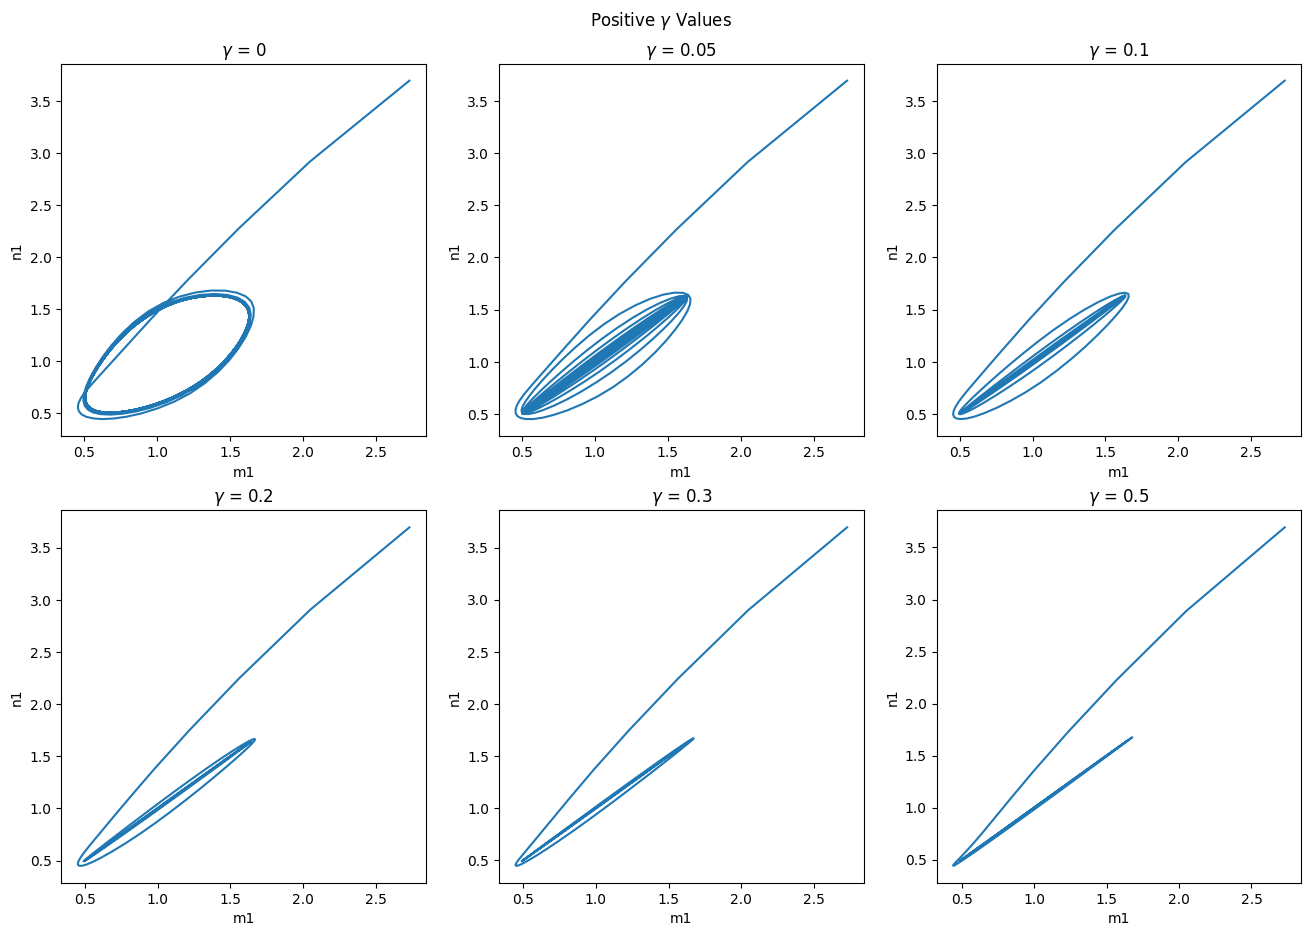

In [190]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Positive $\gamma$ Values')

gamma=0 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 0].plot(sol.y[0,:],sol.y[6,:])
axs[0, 0].set_xlabel('m1')
axs[0, 0].set_ylabel('n1')
axs[0, 0].set_title('$\gamma$ = {}'.format(gamma))

gamma=0.05 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 1].plot(sol.y[0,:],sol.y[6,:])
axs[0, 1].set_xlabel('m1')
axs[0, 1].set_ylabel('n1')
axs[0, 1].set_title('$\gamma$ = {}'.format(gamma))

gamma=0.1 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 2].plot(sol.y[0,:],sol.y[6,:])
axs[0, 2].set_xlabel('m1')
axs[0, 2].set_ylabel('n1')
axs[0, 2].set_title('$\gamma$ = {}'.format(gamma))

gamma=0.2 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 0].plot(sol.y[0,:],sol.y[6,:])
axs[1, 0].set_xlabel('m1')
axs[1, 0].set_ylabel('n1')
axs[1, 0].set_title('$\gamma$ = {}'.format(gamma))

gamma=0.3 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 1].plot(sol.y[0,:],sol.y[6,:])
axs[1, 1].set_xlabel('m1')
axs[1, 1].set_ylabel('n1')
axs[1, 1].set_title('$\gamma$ = {}'.format(gamma))

gamma=0.5 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 2].plot(sol.y[0,:],sol.y[6,:])
axs[1, 2].set_xlabel('m1')
axs[1, 2].set_ylabel('n1')
axs[1, 2].set_title('$\gamma$ = {}'.format(gamma))

fig.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.2, wspace=0.2)

We see that when there is no coupling strength ($\gamma = 0$), the parametric curve creates a limit cycle where its center line is along the line $n_1 = m_1$. As we increase the value of $\gamma$, the parametric curve simply oscillate along the line $n_1 = m_1$. This means that the values of $m_1$ and $n_1$ are equal and so two oscillations are synchronized. Thus, increasing $\gamma$ value synchronizes two oscillations more.

Next, we look at what happend if we decrease $\gamma$ value to the negative side:

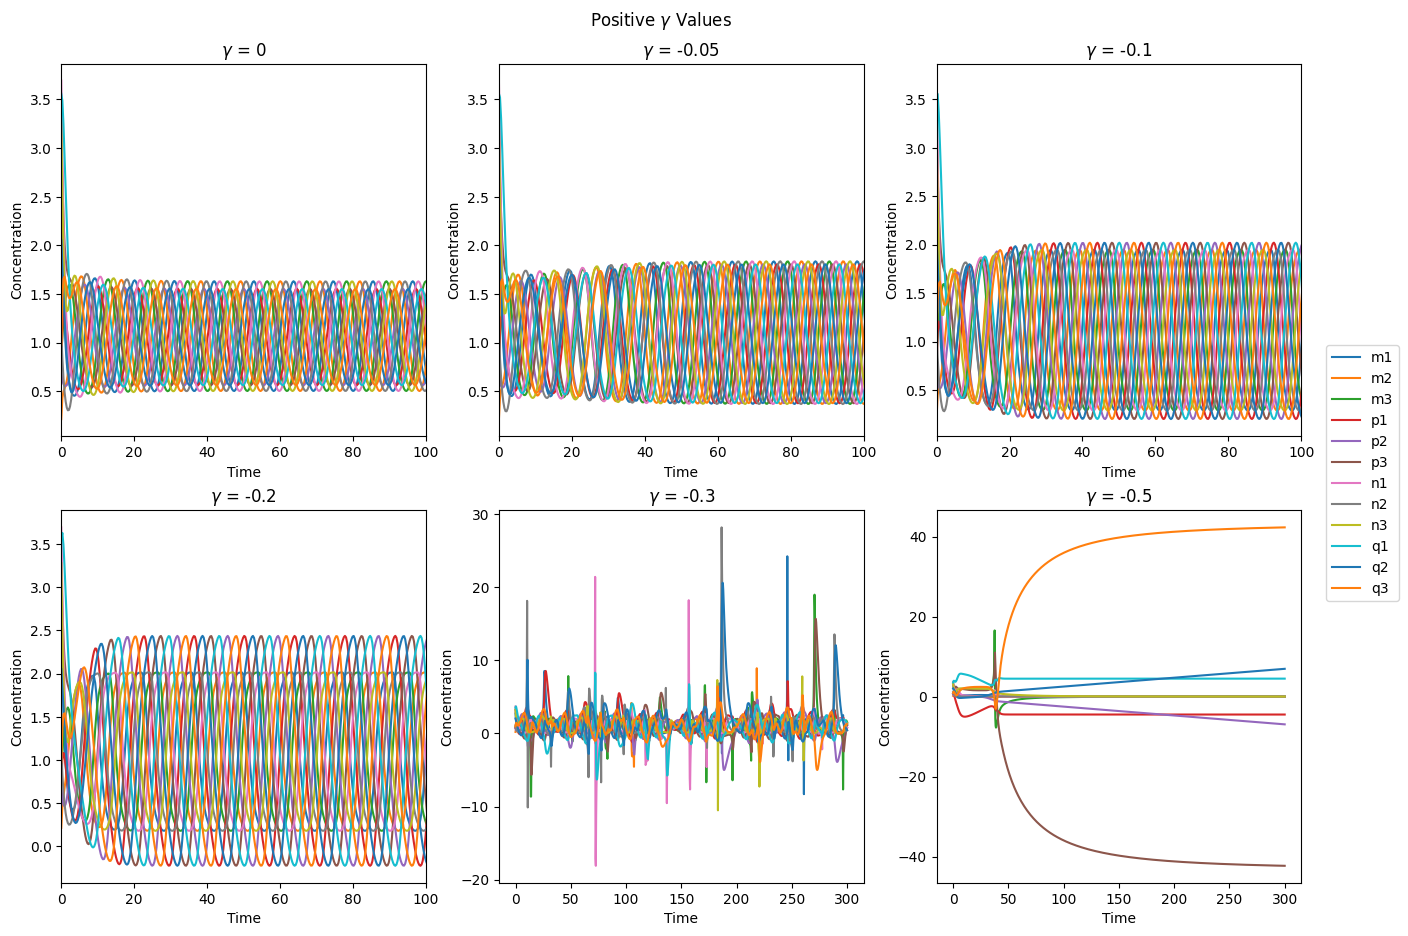

In [191]:
gamma=0 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Positive $\gamma$ Values')

plot_solution(axs[0, 0], sol)
axs[0, 0].set_xlim(0, 100)
axs[0, 0].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Concentration')

gamma=-0.05 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[0, 1], sol)
axs[0, 1].set_xlim(0, 100)
axs[0, 1].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Concentration')

gamma=-0.1 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[0, 2], sol)
axs[0, 2].set_xlim(0, 100)
axs[0, 2].set_title('$\gamma$ = {}'.format(gamma))
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Concentration')

gamma=-0.2 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 0], sol)
axs[1, 0].set_xlim(0, 100)
axs[1, 0].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Concentration')

gamma=-0.3 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 1], sol)
# axs[1, 1].set_xlim(0, 100)
axs[1, 1].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Concentration')

gamma=-0.5 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
plot_solution(axs[1, 2], sol)
# axs[1, 2].set_xlim(0, 100)
axs[1, 2].set_title('$\gamma$ = {}'.format(gamma))
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Concentration')
axs[1, 2].legend(loc='center left', bbox_to_anchor=(1.05, 1.1))

fig.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.2, wspace=0.2)

From the above plots, we clearly see that as we decrease $\gamma$ value two oscillations desynchronize. Until $\gamma=-0.2$, the trajectories of two oscillations become more different from each other and the amplitudes of two oscillations become larger as we decrease the value of $\gamma$. Then, when $\gamma=-0.3$, two oscillations become completely random, and when $\gamma=-0.5$, some concentrations stay at 0 while others blow up to high values. For parametric curve $(m_1(t), n_1(t))$, we get:

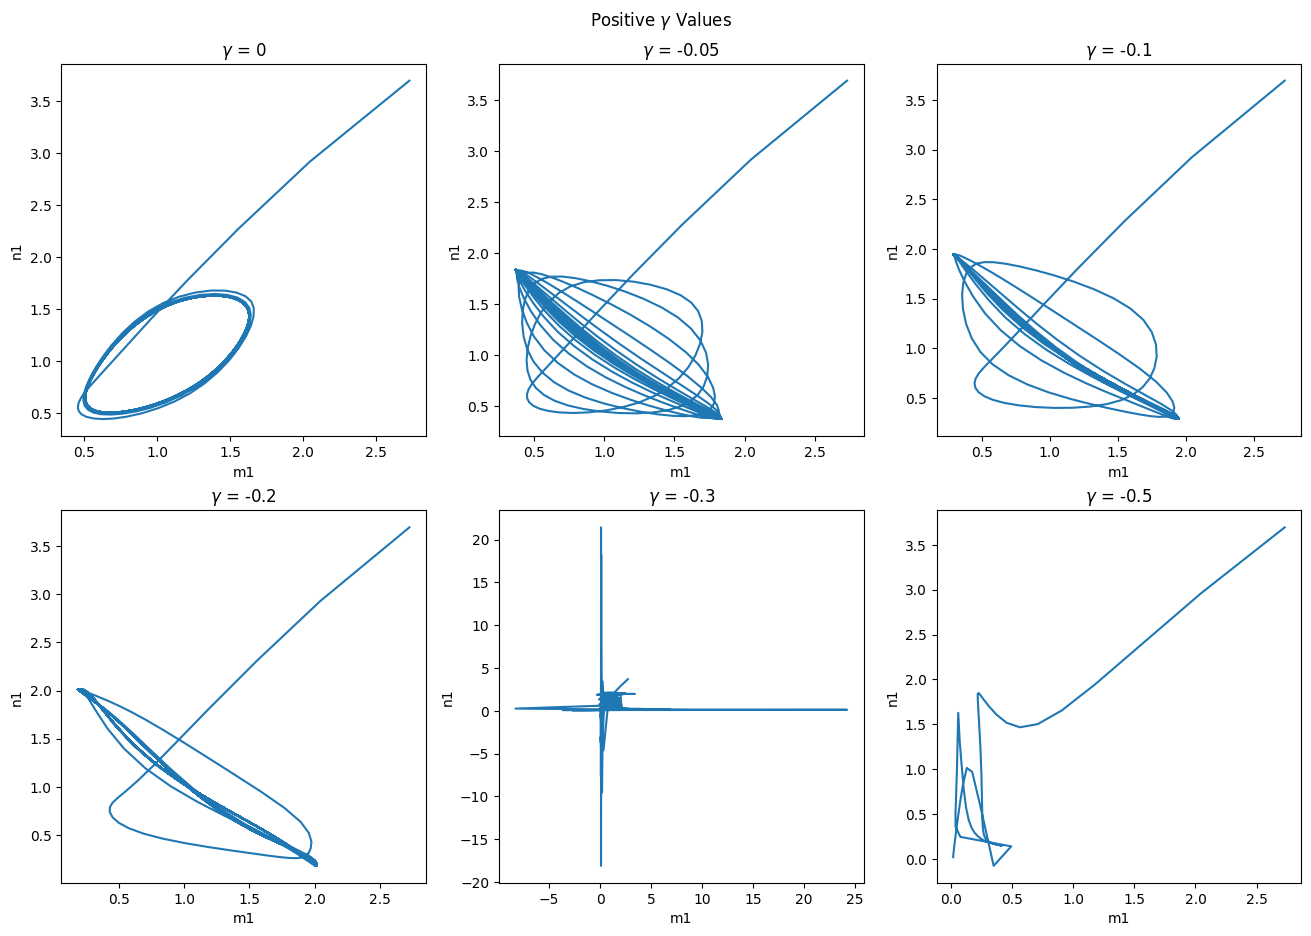

In [192]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Positive $\gamma$ Values')

gamma=0 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 0].plot(sol.y[0,:],sol.y[6,:])
axs[0, 0].set_xlabel('m1')
axs[0, 0].set_ylabel('n1')
axs[0, 0].set_title('$\gamma$ = {}'.format(gamma))

gamma=-0.05 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 1].plot(sol.y[0,:],sol.y[6,:])
axs[0, 1].set_xlabel('m1')
axs[0, 1].set_ylabel('n1')
axs[0, 1].set_title('$\gamma$ = {}'.format(gamma))

gamma=-0.1 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[0, 2].plot(sol.y[0,:],sol.y[6,:])
axs[0, 2].set_xlabel('m1')
axs[0, 2].set_ylabel('n1')
axs[0, 2].set_title('$\gamma$ = {}'.format(gamma))

gamma=-0.2 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 0].plot(sol.y[0,:],sol.y[6,:])
axs[1, 0].set_xlabel('m1')
axs[1, 0].set_ylabel('n1')
axs[1, 0].set_title('$\gamma$ = {}'.format(gamma))

gamma=-0.3 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 1].plot(sol.y[0,:],sol.y[6,:])
axs[1, 1].set_xlabel('m1')
axs[1, 1].set_ylabel('n1')
axs[1, 1].set_title('$\gamma$ = {}'.format(gamma))

gamma=-0.5 # Coupling strength
sol = run_simulation(alpha, alpha0, beta, n, gamma)
axs[1, 2].plot(sol.y[0,:],sol.y[6,:])
axs[1, 2].set_xlabel('m1')
axs[1, 2].set_ylabel('n1')
axs[1, 2].set_title('$\gamma$ = {}'.format(gamma))

fig.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.2, wspace=0.2)

Hence, we clearly see that the limit cycle disappear as we decrease the value of $\gamma$. At the end, when $\gamma=-0.5$, the parametric curve has a random movement.

In summary, larger positive $\gamma$ values synchronize two oscillations better, meaning that the trajectories of two oscillations converge faster. In contrast, decreasing $\gamma$ value in negative side makes two oscillations to desynchronize. Intuitively, we can understand this phenomenom in terms of coupling strength. The value of $\gamma$ represents how strongly two repressilators are related to each other. Hence, if there is a stronger bond (higher $\gamma$ value) between the two repressilators, the two repressilators try to resemble each other more synchronizing their oscillations. In contrast, when $\gamma$ is decreasing in the negative side, there is weaker bond between the two repressilators and negative value even means the two repressilators are giving negative feedbacks to each other. As a result, the two repressilators are hindering each other's oscillation, so their oscillations desynchronize. 



### Problem 2

For Fig. 7a, we start with defining several functions. First, we define the function of Z activity. We also define an OR logic gate where both inputs are activators. Lastly, we define the ODE for double positive loop based on the mathematical model in Shen-Orr et al:

In [193]:
def Z_func(t):
    if t >= 2 and t <= 4:
        return 1
    else:
        return 0

def or_gate_7a(x1, x2, K1, K2):
    if x1 >= K1 or x2 >= K2:
        return 1
    else:
        return 0

def double_positive_loop(t, x, Tx, Ty, a):
    X = x[0]
    Y = x[1]

    dXdt = or_gate_7a(Z_func(t), Y, Tx, Tx) - a * X
    dYdt = or_gate_7a(Z_func(t), X, Ty, Ty) - a * Y
    
    return np.array([dXdt, dYdt])


From Alon's paper, we know that both proteins X and Y are produced when Z is activated. Also, when Z is deactivated, the proteins X and Y are still being produced because X and Y are regulating each other as activators. Hence, protein X is produced either when Z is activated or when the level of protein Y is higher than its threshold. Similarly, protein Y is produced either when Z is activated or when the level of protein X is higher than its threshold. Therefore, an OR logic gate is appiled in ODE for both proteins X and Y.

We solve the ODE to reproduce the plots in Alon's paper:

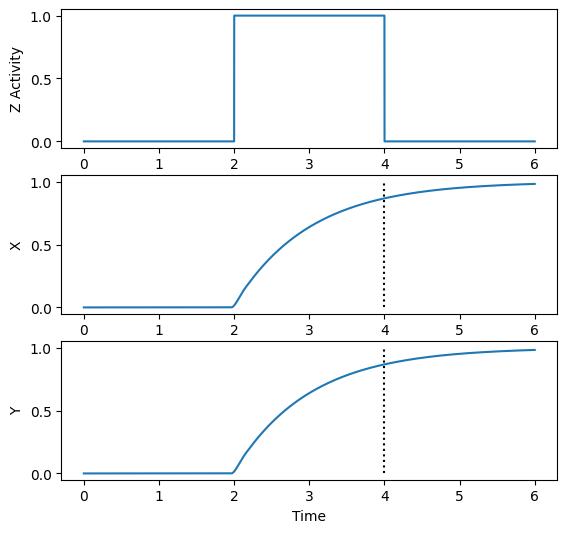

In [194]:
# SOLVE
# Specify our initial condition
x0 = np.array([0, 0])

# Specify trange, a time range for simulation: two element array
tstart = 0
tend = 6
trange = np.array([tstart, tend])

# Specify tlist,  a list of time points at which want to return the solution
numt = 1000000
tlist = np.linspace(tstart, tend, numt)

# Initialize parameters
Ty = 0.5
Tz = 0.5
a = 1

sol = scint.solve_ivp(double_positive_loop, trange, x0, t_eval = tlist, args = (Ty, Tz, a))

# Plot the solutions
fig, axs = plt.subplots(3)

# Z function
axs[0].plot(sol.t, np.array([Z_func(t) for t in sol.t]))
axs[0].set_xticks(np.arange(0, 7))
axs[0].set_ylabel('Z Activity')

# X function
axs[1].plot(sol.t, sol.y[0,:])
axs[1].set_xticks(np.arange(0, 7))
axs[1].set_ylabel('X')
axs[1].vlines(4, 0, 1, colors = 'k', linestyles = 'dotted')

# Y function
axs[2].plot(sol.t, sol.y[1,:])
axs[2].set_xticks(np.arange(0, 7))
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Y')
axs[2].vlines(4, 0, 1, colors = 'k', linestyles = 'dotted')

fig.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

Next for Fig. 7b, we start with defining more functions. First, we use the function of $Z$ activity that we defined above for Fig. 7a. We also define a new OR logic gate where one input is an activator while another is a repressor. Moreover, we define an AND logic gate where both inputs are repressors. Lastly, we define the ODE for double negative loop based on the mathematical model in Shen-Orr et al:

In [195]:
def or_gate_7b(x1, x2, K1, K2):
    if x1 >= K1 or x2 < K2:
        return 1
    else:
        return 0
    
def and_gate_7b(x1, x2, K1, K2):
    if x1 < K1 and x2 < K2:
        return 1
    else:
        return 0

def double_negative_loop(t, x, Tx, Ty, a):
    X = x[0]
    Y = x[1]

    dXdt = or_gate_7b(Z_func(t), Y, Tx, Tx) - a * X
    dYdt = and_gate_7b(Z_func(t), X, Ty, Ty) - a * Y
    
    return np.array([dXdt, dYdt])

From Alon's paper, we know that protein X is produced when Z is activated and protein Y is repressed when Z is activated. When Z is deactivated, the protein X is still being produced since Y acts as a repressor to X and the level of Y is less than its threshold. Also, when Z is deactivated, Y is still being repressed because X acts as a repressor to Y and the level of X is greater than its threshold. Hence, protein X is produced either when Z is activated or when the level of protein Y is less than its threshold. Conversly, protein Y is activated when Z is deactivated and when the level of protein X is less than its threshold. Therefore, an OR logic gate is appiled in derivative for protein X and an AND logic gate is appiled in derivative for Y.

We solve the ODE to reproduce the plots in Alon's paper:

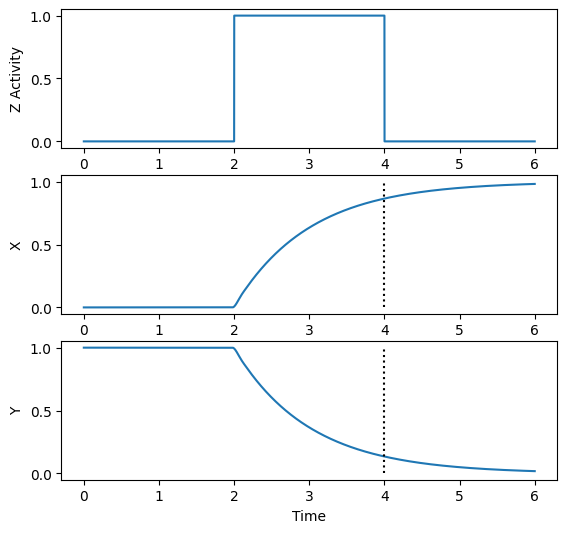

In [196]:
# SOLVE
# Specify our initial condition
x0 = np.array([0, 1])

# Specify trange, a time range for simulation: two element array
tstart = 0
tend = 6
trange = np.array([tstart, tend])

# Specify tlist,  a list of time points at which want to return the solution
numt = 1000000
tlist = np.linspace(tstart, tend, numt)

# Initialize parameters
Ty = 0.5
Tz = 0.5
a = 1

sol = scint.solve_ivp(double_negative_loop, trange, x0, t_eval = tlist, args = (Ty, Tz, a))

# Plot the solutions
fig, axs = plt.subplots(3)

# Z function
axs[0].plot(sol.t, np.array([Z_func(t) for t in sol.t]))
axs[0].set_xticks(np.arange(0, 7))
axs[0].set_ylabel('Z Activity')

# X function
axs[1].plot(sol.t, sol.y[0,:])
axs[1].set_xticks(np.arange(0, 7))
axs[1].set_ylabel('X')
axs[1].vlines(4, 0, 1, colors = 'k', linestyles = 'dotted')

# Y function
axs[2].plot(sol.t, sol.y[1,:])
axs[2].set_xticks(np.arange(0, 7))
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Y')
axs[2].vlines(4, 0, 1, colors = 'k', linestyles = 'dotted')

fig.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)


For Fig. 7c, we start with defining necessary functions. First is the function of $X_1$ where we define it as continuously activated. Next, we define an AND logic gate where both inputs are activators. Then, we define another AND logic gate where one input is an activator and another is a repressor. We also define a single gate which is the function $F(X, T)$ in Shen-Orr et al. Lastly, we define the ODE for all other variables: $Y_1, Z_1, X_2, Y_2, Z_2, Z_3$:

In [197]:
def X1_func(t):
    return 1 

def and_gate1_7c(x1, x2, K1, K2):
    if x1 >= K1 and x2 >= K2:
        return 1
    else:
        return 0

def and_gate2_7c(x1, x2, K1, K2):
    if x1 >= K1 and x2 < K2:
        return 1
    else:
        return 0

def single_gate(x, K):
    return 1 if x >= K else 0

def Bacillus_subtiis(t, x, a, b, T, Tz1, Tx2, Tz2, Tz3):
    Y1 = x[0]
    Z1 = x[1]
    X2 = x[2]
    Y2 = x[3]
    Z2 = x[4]
    Z3 = x[5]

    dY1dt = X1_func(t) - a * Y1
    dZ1dt = b * and_gate2_7c(X1_func(t), Y1, T, Tz1) - a * Z1
    dX2dt = and_gate1_7c(X1_func(t), Y1, T, Tx2) - a * X2
    dY2dt = single_gate(X2, T) - a * Y2
    dZ2dt = b * and_gate2_7c(X2, Y2, T, Tz2) - a * Z2
    dZ3dt = and_gate1_7c(X2, Y2, T, Tz3) - a * Z3

    return np.array([dY1dt, dZ1dt, dX2dt, dY2dt, dZ2dt, dZ3dt])

When defining the ODE, we simply follow the diagram in Fig. 7c in Alon's paper. The general form follows the mathematical model in Shen-Orr et al., but there are some modification in coefficients and thresholds to reproduce similar plots to those in Fig. 7c. For example, when defining the derivative for $Z_1$, we used the AND logic gate where one input is activator ($X_1$) and another is repressor ($Y_1$) with different combination of coefficients and thresholds. Thus, following the diagram in Fig. 7c, we reproduced the plots:

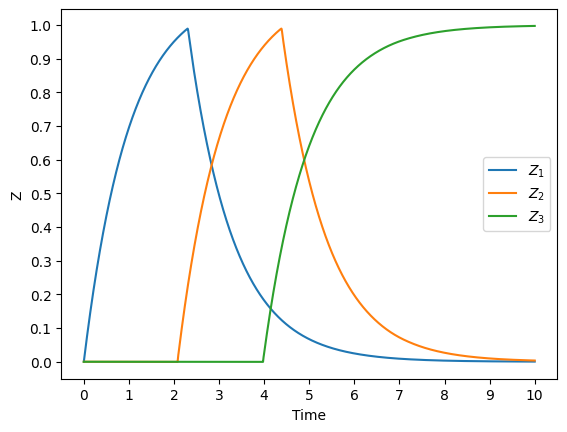

In [198]:
# SOLVE
# Specify our initial condition
x0 = np.array([0, 0, 0, 0, 0, 0])

# Specify trange, a time range for simulation: two element array
tstart = 0
tend = 10
trange = np.array([tstart, tend])

# Specify tlist,  a list of time points at which want to return the solution
numt = 1000000
tlist = np.linspace(tstart, tend, numt)

T = 0.5
Tz1 = 0.9
Tx2 = 0.75
Tz2 = 0.9
Tz3 = 0.85
a = 1
b = 1.1

sol = scint.solve_ivp(Bacillus_subtiis, trange, x0, t_eval = tlist, args = (a, b, T, Tz1, Tx2, Tz2, Tz3), method = 'DOP853')

plt.plot(sol.t, sol.y[1, :], label='$Z_1$')
plt.plot(sol.t, sol.y[4, :], label='$Z_2$')
plt.plot(sol.t, sol.y[5, :], label='$Z_3$')
plt.xticks(np.arange(11))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend(loc = 'center right')
plt.show()

Note that for solving the ODE, the 'DOP853' method is same method as the default method 'RK45' but more accurate.